# Shap dependence

[![open in colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ing-bank/probatus/blob/master/docs/tutorials/nb_shap_dependence.ipynb)

This notebook illustrates the use of the `interpret.shap_dependence` module. The `shap_dependence` module can be used to explain the module using shap values.

### Imports
First let's import some dependencies and set some settings:

In [ ]:
%%capture
!pip install probatus

In [14]:
import warnings

import pandas as pd
from sklearn.ensemble import RandomForestClassifier

from probatus.interpret.shap_dependence import DependencePlotter

warnings.filterwarnings('ignore')

### Data preparation
Now let's load a sample dataset

In [15]:
# Download and read the dataset
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# Change the problem in a binary classification problem: 'setosa' or not.
iris['species'] = iris['species'].apply(lambda x: 1 if x == 'setosa' else 0)
iris = iris.rename(columns={'species': 'setosa'})

# Extract the relevant features
features= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[features]
y = iris['setosa']

# Show the dataset
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,setosa
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


and let's train a random forest classifier:

In [16]:
clf = RandomForestClassifier()
clf = clf.fit(X, y)

### Shap dependence
First, we fit the `DependencePlotter`

In [17]:
tdp = DependencePlotter(clf).fit(X, y)

Now, we can plot the shap dependence for a specific feature. The top plot shows the shap values for 

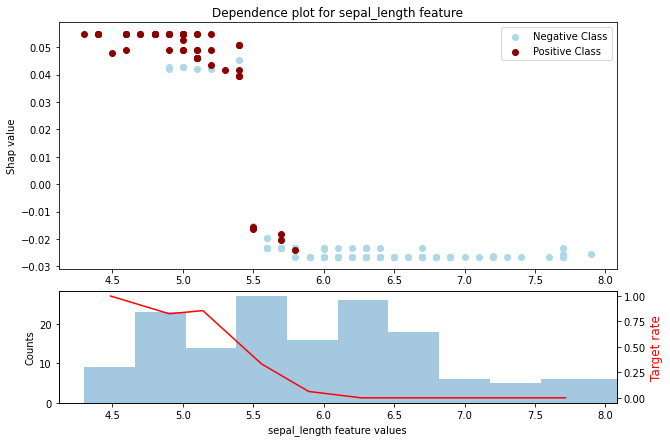

In [18]:
target_names = ['Not setosa', 'Setosa']
fig = tdp.plot(feature='sepal_length', figsize=(10, 7))

## Plotting with outliers

Say we alter the dataset artificially to include an outlier. The plotting will be disturbed, but we can still plot by setting the plotter's parameters.

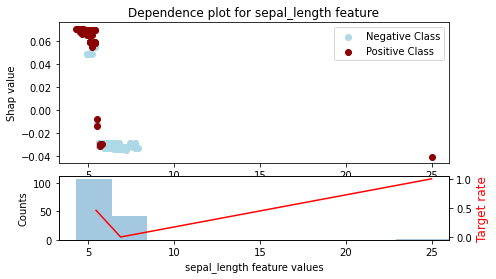

In [19]:
# Add an outlier
X.at[0, 'sepal_length'] = 25

# Retrain the classifier and fit the plotter
clf = RandomForestClassifier().fit(X, y)
tdp = DependencePlotter(clf).fit(X, y)

# Plot the dependence plot.
fig = tdp.plot(feature='sepal_length', figsize=(7, 4))

As we can see, the plot is not readable, and the histogram makes little sense. Both issues can be solved:

### Removing the outliers
The outliers can be removed by specifying the `min_q` and `max_q` parameters. The `min_q` parameter is the minimum quantile after which data points are considered, and `max_q` is the maximum quantile before which they are considered. In this case (with one large outlier), we can set the `max_q` parameter to `0.99` to only remove the largest point.

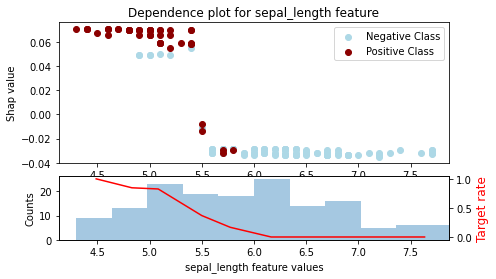

In [20]:
fig = tdp.plot(feature='sepal_length', figsize=(7, 4), max_q=0.99)

### Working with skewed distributions
The binning functionality of `probatus` can be used to plot a sensible histogram under different distributions of feature data. For example, using the `'quantile'` setting (without removing the outlier, produces the following histogram.

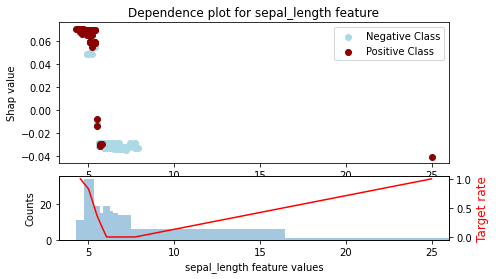

In [21]:
fig = tdp.plot(feature='sepal_length', figsize=(7, 4), type_binning='agglomerative')